In [366]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [367]:
df_raw = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/regularized-linear-regression-project-tutorial/main/demographic_health_data.csv")

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Columns: 108 entries, fips to Urban_rural_code
dtypes: float64(61), int64(45), object(2)
memory usage: 2.6+ MB


In [368]:
df_raw.sample(10)

,fips,TOT_POP,0-9,0-9 y/o % of total pop,19-Oct,10-19 y/o % of total pop,20-29,20-29 y/o % of total pop,30-39,30-39 y/o % of total pop,...,COPD_number,diabetes_prevalence,diabetes_Lower 95% CI,diabetes_Upper 95% CI,diabetes_number,CKD_prevalence,CKD_Lower 95% CI,CKD_Upper 95% CI,CKD_number,Urban_rural_code
570,16043,13168,1691,12.841738,2066,15.689550,1612,12.241798,1548,11.755772,...,739,11.5,10.5,12.5,1125,3.2,3.0,3.5,313,5
1109,21237,7177,858,11.954856,924,12.874460,745,10.380382,817,11.383586,...,1005,19.2,17.8,20.7,1062,4.6,4.2,5.0,255,6
1722,31141,33363,4868,14.591014,4633,13.886641,3961,11.872434,4088,12.253095,...,1607,10.5,9.6,11.3,2584,2.9,2.7,3.1,716,5
1747,32005,48467,3829,7.900221,4936,10.184249,4192,8.649184,4902,10.114098,...,3524,12.0,11.0,13.2,4883,3.5,3.3,3.8,1426,5
2418,46119,1392,161,11.566092,155,11.135057,118,8.477011,149,10.704023,...,67,11.0,9.9,12.0,121,3.2,3.0,3.5,36,5
1699,31095,7097,820,11.554178,876,12.343244,648,9.130619,749,10.553755,...,479,12.6,11.5,13.7,699,3.6,3.3,3.9,199,6
1292,26127,26625,3221,12.097653,3463,13.006573,2922,10.974648,2829,10.625352,...,2314,13.7,12.6,14.9,2823,3.8,3.5,4.1,771,6
1577,29195,22895,2769,12.094344,3198,13.968115,3075,13.430880,2669,11.657567,...,1801,12.8,11.9,13.7,2274,3.4,3.1,3.6,599,5
1399,28001,31192,3440,11.028469,3423,10.973968,3881,12.442293,4138,13.266222,...,2838,19.6,18.5,20.7,4882,4.7,4.4,4.9,1161,5
2436,47021,40439,4595,11.362793,5242,12.962734,4746,11.736195,5136,12.700611,...,3113,11.9,10.9,12.9,3748,3.0,2.7,3.2,929,2


In [369]:
df_raw.to_csv('../data/raw/data_raw.csv')

In [370]:
df_processed = df_raw.copy()

In [371]:
list1= list(df_processed.columns)
list1[10:]

['40-49',
 '40-49 y/o % of total pop',
 '50-59',
 '50-59 y/o % of total pop',
 '60-69',
 '60-69 y/o % of total pop',
 '70-79',
 '70-79 y/o % of total pop',
 '80+',
 '80+ y/o % of total pop',
 'White-alone pop',
 '% White-alone',
 'Black-alone pop',
 '% Black-alone',
 'Native American/American Indian-alone pop',
 '% NA/AI-alone',
 'Asian-alone pop',
 '% Asian-alone',
 'Hawaiian/Pacific Islander-alone pop',
 '% Hawaiian/PI-alone',
 'Two or more races pop',
 '% Two or more races',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2018',
 'GQ_ESTIMATES_2018',
 'R_birth_2018',
 'R_death_2018',
 'R_NATURAL_INC_2018',
 'R_INTERNATIONAL_MIG_2018',
 'R_DOMESTIC_MIG_2018',
 'R_NET_MIG_2018',
 'Less than a high school diploma 2014-18',
 'High school diploma only 2014-18',
 "Some college or associate's degree 2014-18",
 "Bachelor's degree or higher 2014-18",
 'Percent of adults with less than a high school diploma 2014-18',
 'Percent of adults with a high school diploma only 2014-18',
 "Percent of adults completi

In [372]:
df_interim=df_processed = df_processed[["0-9","19-Oct","20-29","30-39","40-49","50-59","60-69","70-79","80+","% White-alone","% Black-alone","% NA/AI-alone","% Asian-alone","% Hawaiian/PI-alone","Less than a high school diploma 2014-18","High school diploma only 2014-18","Bachelor's degree or higher 2014-18","MEDHHINC_2018","Employed_2018","Unemployed_2018","Active Physicians per 100000 Population 2018 (AAMC)","Obesity_prevalence","Heart disease_prevalence", "diabetes_prevalence", "COPD_prevalence", "CKD_prevalence"]]

In [373]:
df_interim.describe().T

,count,mean,std,min,25%,50%,75%,max
0-9,3140.0,12740.302866,41807.301846,0.000000,1280.500000,3057.000000,8097.000000,1.208253e+06
19-Oct,3140.0,13367.976752,42284.392134,0.000000,1374.500000,3274.000000,8822.250000,1.239139e+06
20-29,3140.0,14469.331529,49577.725396,0.000000,1263.750000,3108.000000,8976.250000,1.557073e+06
30-39,3140.0,13916.490127,48990.951710,11.000000,1232.750000,3000.500000,8314.250000,1.501844e+06
40-49,3140.0,12885.214331,43472.189993,4.000000,1245.250000,3048.500000,8120.500000,1.350076e+06
50-59,3140.0,13638.031529,42720.629434,14.000000,1483.000000,3515.500000,9157.250000,1.306003e+06
60-69,3140.0,11916.213057,34518.581878,20.000000,1476.500000,3410.000000,8710.500000,1.014325e+06
70-79,3140.0,7220.310510,20287.498429,6.000000,950.750000,2177.000000,5574.000000,5.725300e+05
80+,3140.0,4035.541720,12063.782251,0.000000,533.000000,1160.000000,2899.750000,3.562750e+05
% White-alone,3140.0,84.494109,16.348987,3.841985,79.620473,91.410189,95.521727,9.904378e+01


In [374]:
df_interim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3140 entries, 0 to 3139
Data columns (total 26 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   0-9                                                  3140 non-null   int64  
 1   19-Oct                                               3140 non-null   int64  
 2   20-29                                                3140 non-null   int64  
 3   30-39                                                3140 non-null   int64  
 4   40-49                                                3140 non-null   int64  
 5   50-59                                                3140 non-null   int64  
 6   60-69                                                3140 non-null   int64  
 7   70-79                                                3140 non-null   int64  
 8   80+                                                  3140 non-null  

In [375]:
X = df_interim.drop(["Heart disease_prevalence"], axis=1)
y = df_interim["Heart disease_prevalence"]

In [376]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2115) #Test case is the % of data for test, random_state = seed

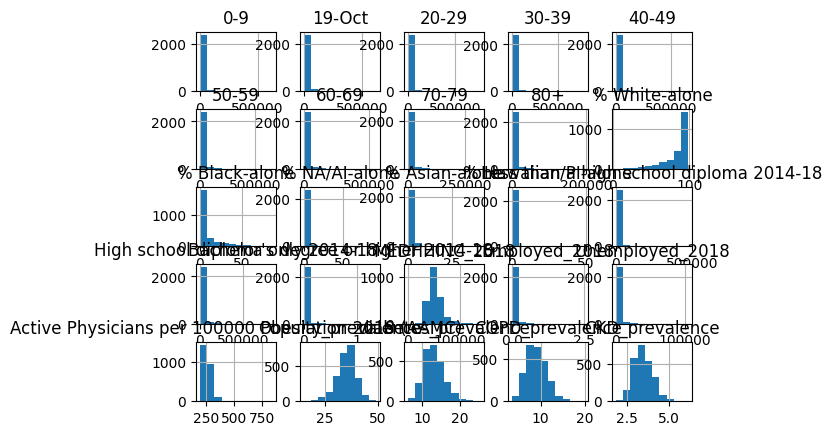

In [377]:
X_train.hist()
plt.show()

In [378]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [379]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=2119) #Cross validation

In [380]:
model = LassoCV(alphas=np.arange(0,1,0.05),cv=cv, n_jobs=-1)


In [381]:
model.fit(X_train_scaled, y_train)

/workspaces/regularization_linearregression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/regularization_linearregression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/workspaces/regularization_linearregression/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.87674489205256, tolerance: 0.6748211079646016
  model = cd_fast.enet_coordinate_descent_gram(
/wor

LassoCV(alphas=array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=2119),
        n_jobs=-1)

In [382]:
model.alpha_

0.0

In [383]:
y_hat = model.predict(X_test_scaled)

In [384]:
print(f"MSE: {mean_squared_error(y_hat, y_test)}")
print(f"R2: {r2_score(y_test,y_hat)}")

MSE: 0.2137981667090748
R2: 0.9366853384650875
